# Obtaining the Efficient Frontier using Python

In [45]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

### Download stock data

In [3]:
# Download stock price data for Amazon, Google and Facebook
stock = ['amzn','Googl', 'fb']
stockprice=pd.DataFrame()
for a in stock:
    stockprice[a] = wb.DataReader(a, data_source='yahoo',start='2014-1-1')['Adj Close']

In [4]:
stockprice.head()

,amzn,Googl,fb
Date,,,
2014-01-02,397.970001,557.117126,54.709999
2014-01-03,396.440002,553.053040,54.560001
2014-01-06,393.630005,559.219238,57.200001
2014-01-07,398.029999,570.000000,57.919998
2014-01-08,401.920013,571.186157,58.230000


### Calculate daily returns

In [5]:
log_returns= np.log(stockprice/stockprice.shift(1))
len_stocks=len(stock)
# Generate random weights for the stocks in the portfolio, Sum should be one
weights=np.random.random(len_stocks)
weights/=np.sum(weights)
weights

array([0.17013925, 0.61208408, 0.21777667])

### Expected Portfolio return

In [6]:
portfolio_ret=np.sum(weights*log_returns.mean())*250
portfolio_ret

0.180192094856444

### Expected Portfolio Variance

In [7]:
portfolio_var = np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))
portfolio_var

0.050339918544611804

### Expected Portfolio Volatility

In [8]:
portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
portfolio_vol

0.22436559126704747

### Generating the efficient frontier portfolio by calculating Returns and volatility for 1000 different portfolios

In [9]:
pf_returns =[]
pf_vol = []
pf_weights = []

#Generate 1000 different portfolios. Generate random weight combinations, all adding up to 1 
# calculate portfolio returns and volatility for each portfolio using the weights
for x in range(1000):
    weights=np.random.random(len_stocks)
    weights/=np.sum(weights)
    pf_weights.append(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_vol.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))



In [17]:
#List the portfolios as a dataframe
df = pd.DataFrame(pf_weights, columns = stock)

In [38]:
#Add returns and volatility for each portfolio to the dataframe
df['Return']=pf_returns
df['Volatility']=pf_vol
df.head()

,amzn,Googl,fb,Return,Volatility
0,0.503835,0.338243,0.157921,0.209603,0.239128
1,0.578063,0.075784,0.346154,0.229350,0.255403
2,0.099217,0.431614,0.469169,0.189578,0.234620
3,0.162033,0.266301,0.571665,0.202568,0.244789
4,0.273489,0.257416,0.469095,0.206981,0.240249


In [19]:
pf_returns = np.array(pf_returns)
pf_vol = np.array(pf_vol)

In [20]:
df.head()

,amzn,Googl,fb
0,0.503835,0.338243,0.157921
1,0.578063,0.075784,0.346154
2,0.099217,0.431614,0.469169
3,0.162033,0.266301,0.571665
4,0.273489,0.257416,0.469095


In [35]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_vol})

In [36]:
portfolios.head()

,Return,Volatility
0,0.209603,0.239128
1,0.229350,0.255403
2,0.189578,0.234620
3,0.202568,0.244789
4,0.206981,0.240249


Text(0, 0.5, 'Expected Return')

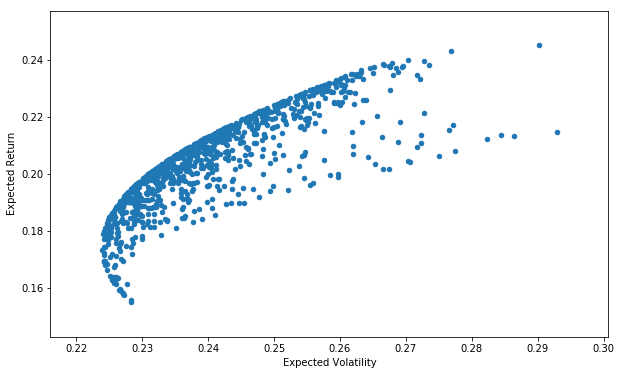

In [23]:
#Generate scatter plot using Return and Volatility for 1000 portfolios - Markowitz's Efficient Frontier
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

Text(0, 0.5, 'Expected Return')

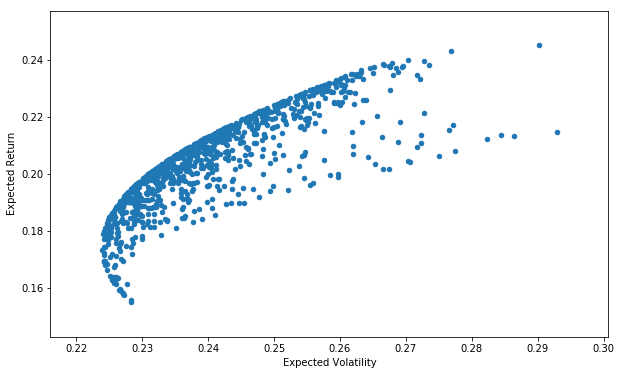

In [39]:
##Generate scatter plot using Return and Volatility for 1000 different portfolios - Markowitz's Efficient Frontier
df.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [40]:
# Calculate Return per risk
df['Return/Risk']=df['Return']/df['Volatility']

In [41]:
df.head()

,amzn,Googl,fb,Return,Volatility,Return/Risk
0,0.503835,0.338243,0.157921,0.209603,0.239128,0.876531
1,0.578063,0.075784,0.346154,0.229350,0.255403,0.897994
2,0.099217,0.431614,0.469169,0.189578,0.234620,0.808023
3,0.162033,0.266301,0.571665,0.202568,0.244789,0.827519
4,0.273489,0.257416,0.469095,0.206981,0.240249,0.861526


In [42]:
# Find the portfolio giving maximum returns per risk
df.loc[df['Return/Risk'].idxmax()]

amzn           0.606935
Googl          0.051169
fb             0.341896
Return         0.231955
Volatility     0.258278
Return/Risk    0.898084
Name: 283, dtype: float64

In [44]:
# Find portfolio with minimum volatility
df.loc[df['Volatility'].idxmin()]

amzn           0.146446
Googl          0.706399
fb             0.147155
Return         0.173198
Volatility     0.223958
Return/Risk    0.773352
Name: 690, dtype: float64